In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

from category_encoders import BinaryEncoder,OneHotEncoder,JamesSteinEncoder,HashingEncoder,CountEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
#$from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
#$from sklearn.ensemble import GradientBoostingClassifier
#$from sklearn.linear_model import LogisticRegression
#$from sklearn.tree import DecisionTreeClassifier
#$from sklearn.ensemble import VotingClassifier


#$from catboost import CatBoostRegressor
#$from lightgbm import LGBMClassifier

from xgboost import XGBClassifier


#$from imblearn.under_sampling import NearMiss
#$from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

pd.options.display.max_rows=100
pd.options.display.max_columns=10000

1. azn temizlemek
2. distuance km temizlemek
3. Unnamed: 0 silirik

In [151]:
data=pd.read_excel('files/Turbo_scraped.xlsx')
df=data.copy()
df.head()



,Unnamed: 0,price,brand,model,released_at,city,ban,color,engine,distance,gearbox,transmitter,is_new
0,0,13 800 AZN,Nissan,Tiida,2012,Bakı,Hetçbek,Gümüşü,1.5 L/109 a.g./Benzin,153 200 km,Avtomat,Ön,Xeyr
1,1,29 500 USD,Porsche,Cayenne,2012,Bakı,Offroader / SUV,Qara,3.6 L/300 a.g./Benzin,198 000 km,Avtomat,Tam,Xeyr
2,2,34 900 USD,Mitsubishi,L 200,2022,Bakı,Pikap,Gümüşü,2.4 L/137 a.g./Dizel,0 km,Mexaniki,Tam,Bəli
3,3,56 400 EUR,Alfa Romeo,Stelvio,2022,Bakı,Offroader / SUV,Göy,2.0 L/280 a.g./Benzin,0 km,Avtomat,Tam,Bəli
4,4,47 000 USD,BMW,X5,2014,Bakı,Offroader / SUV,Ağ,3.0 L/306 a.g./Benzin,160 307 km,Avtomat,Tam,Xeyr


In [152]:
df.shape

(11249, 13)

In [153]:
df.isna().sum()

Unnamed: 0     0
price          0
brand          0
model          0
released_at    0
city           0
ban            0
color          0
engine         0
distance       0
gearbox        0
transmitter    0
is_new         0
dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   11249 non-null  int64 
 1   price        11249 non-null  object
 2   brand        11249 non-null  object
 3   model        11249 non-null  object
 4   released_at  11249 non-null  int64 
 5   city         11249 non-null  object
 6   ban          11249 non-null  object
 7   color        11249 non-null  object
 8   engine       11249 non-null  object
 9   distance     11249 non-null  object
 10  gearbox      11249 non-null  object
 11  transmitter  11249 non-null  object
 12  is_new       11249 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [155]:
for x in df.columns:
    print(df[x].unique())
    print("\n")

[    0     1     2 ... 11246 11247 11248]


['13 800 AZN' '29 500 USD' '34 900 USD' ... '11 250 AZN' '55 700 USD'
 '147 000 AZN']


['Nissan' 'Porsche' 'Mitsubishi' 'Alfa Romeo' 'BMW' 'Mercedes' 'Opel'
 'Hyundai' 'Toyota' 'LADA (VAZ)' 'Chevrolet' 'GAZ' 'Kia' 'Audi' 'Lexus'
 'ZX Auto' 'Fiat' 'Jaguar' 'Volkswagen' 'Land Rover' 'Yamaha' 'Daewoo'
 'Subaru' 'Ford' 'Changan' 'Volvo' 'Honda' 'Jeep' 'Tofas' 'Mazda'
 'SamAuto' 'Hongqi' 'Ravon' 'Lifan' 'Suzuki' 'Geely' 'KamAz' 'Jetour'
 'Bentley' 'Renault' 'Haval' 'SEAT' 'Saipa' 'Scania' 'Baic'
 'Mercedes-Maybach' 'Chery' 'Bajaj' 'DAF' 'Iran Khodro' 'Dodge' 'Haima'
 'Infiniti' 'Ssang Yong' 'Khazar' 'Great Wall' 'GMC' 'DongFeng' 'Wuling'
 'DFSK' 'Lamborghini' 'Skoda' 'Isuzu' 'UAZ' 'Aston Martin' 'HOWO'
 'Cadillac' 'MG' 'FAW' 'Bestune' 'Iveco' 'McLaren' 'Mini' 'Lincoln'
 'Peugeot' 'Foton' 'C.Moto' 'Kuba' 'Soueast' 'Moskvich' 'ZIL' 'ZAZ'
 'Chrysler' 'Tesla' 'Skywell' 'Abarth' 'Shacman' 'Dacia' 'Genesis'
 'Rolls-Royce' 'Smart' 'JAC' 'MAZ' 'KAIYI' 'H

In [156]:
dictyu={}
for x in df.columns:
    dictyu[x]=df[x].unique().shape[0]
print(dictyu)

{'Unnamed: 0': 11249, 'price': 1217, 'brand': 98, 'model': 716, 'released_at': 55, 'city': 58, 'ban': 19, 'color': 17, 'engine': 1014, 'distance': 2271, 'gearbox': 4, 'transmitter': 3, 'is_new': 2}


In [157]:
df.corr()

,Unnamed: 0,released_at
Unnamed: 0,1.000000,-0.042015
released_at,-0.042015,1.000000


#### Deleting AZN for making price col numeric

In [158]:
df['price']

0         13 800 AZN
1         29 500 USD
2         34 900 USD
3         56 400 EUR
4         47 000 USD
            ...     
11244     39 900 USD
11245     55 700 USD
11246     13 000 AZN
11247     45 500 AZN
11248    147 000 AZN
Name: price, Length: 11249, dtype: object

In [159]:
usd=1.7
eur=1.81
df['price']=[ int(x[: x.find(" ",4)].replace(" ",""))*usd if ('USD'  in x) else int(x[: x.find(" ",4)].replace(" ",""))*eur if ('EUR'  in x) else int(x[: x.find(" ",4)].replace(" ","")) for x in df['price']]  

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11249 non-null  int64  
 1   price        11249 non-null  float64
 2   brand        11249 non-null  object 
 3   model        11249 non-null  object 
 4   released_at  11249 non-null  int64  
 5   city         11249 non-null  object 
 6   ban          11249 non-null  object 
 7   color        11249 non-null  object 
 8   engine       11249 non-null  object 
 9   distance     11249 non-null  object 
 10  gearbox      11249 non-null  object 
 11  transmitter  11249 non-null  object 
 12  is_new       11249 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


#### Deleting km for making distance col numeric

In [161]:
## ValueError: invalid literal for int() with base 10: '2km'

#$import regex as re
#$a=[x[:x.find(" ",3)] if x!='0 km' else '0' for x in  df['distance']]    
#$df['distance']=[x for x in list(map(lambda x : re.findall('[^0-9]',x.replace(" ","")),a)) if x!=[]]


#  burda amma tapmaq olur o valuelari

#$ [ x for x in df['distance'] if 'k' in x and 'm' not in x]

#$ [ x for x in df['distance'] if 'km' not in x]

#$ a=[x[:x.find(" ",3)] if x!='0 km' else '0' for x in df['distance'] ]    
#$ list(filter(lambda x : re.match('[a-zA-Z]',x),a))

In [162]:
a=[x[:x.find(" ",4)] if x!='0 km' else '0' for x in df['distance'] ]  

df['distance']=list(map(lambda x : int(x.replace(" ","").replace("k","")),a))

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11249 non-null  int64  
 1   price        11249 non-null  float64
 2   brand        11249 non-null  object 
 3   model        11249 non-null  object 
 4   released_at  11249 non-null  int64  
 5   city         11249 non-null  object 
 6   ban          11249 non-null  object 
 7   color        11249 non-null  object 
 8   engine       11249 non-null  object 
 9   distance     11249 non-null  int64  
 10  gearbox      11249 non-null  object 
 11  transmitter  11249 non-null  object 
 12  is_new       11249 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


#### Deleting 'Unnamed: 0'  col, because we will not need it

In [164]:
df.drop("Unnamed: 0",inplace=True,axis=1)


In [165]:
df.head()

,price,brand,model,released_at,city,ban,color,engine,distance,gearbox,transmitter,is_new
0,13800.0,Nissan,Tiida,2012,Bakı,Hetçbek,Gümüşü,1.5 L/109 a.g./Benzin,153200,Avtomat,Ön,Xeyr
1,50150.0,Porsche,Cayenne,2012,Bakı,Offroader / SUV,Qara,3.6 L/300 a.g./Benzin,198000,Avtomat,Tam,Xeyr
2,59330.0,Mitsubishi,L 200,2022,Bakı,Pikap,Gümüşü,2.4 L/137 a.g./Dizel,0,Mexaniki,Tam,Bəli
3,102084.0,Alfa Romeo,Stelvio,2022,Bakı,Offroader / SUV,Göy,2.0 L/280 a.g./Benzin,0,Avtomat,Tam,Bəli
4,79900.0,BMW,X5,2014,Bakı,Offroader / SUV,Ağ,3.0 L/306 a.g./Benzin,160307,Avtomat,Tam,Xeyr


### Seperating engine col

In [166]:
df['engine size']=[float(x.split("/")[0].replace(" L","")) for x in df['engine']]
df['engine a.g.']=[int(x.split("/")[1].replace(" a.g.","")) for x in df['engine']]
df['engine fuel']=[x.split("/")[2] for x in df['engine']]
df.head()

,price,brand,model,released_at,city,ban,color,engine,distance,gearbox,transmitter,is_new,engine size,engine a.g.,engine fuel
0,13800.0,Nissan,Tiida,2012,Bakı,Hetçbek,Gümüşü,1.5 L/109 a.g./Benzin,153200,Avtomat,Ön,Xeyr,1.5,109,Benzin
1,50150.0,Porsche,Cayenne,2012,Bakı,Offroader / SUV,Qara,3.6 L/300 a.g./Benzin,198000,Avtomat,Tam,Xeyr,3.6,300,Benzin
2,59330.0,Mitsubishi,L 200,2022,Bakı,Pikap,Gümüşü,2.4 L/137 a.g./Dizel,0,Mexaniki,Tam,Bəli,2.4,137,Dizel
3,102084.0,Alfa Romeo,Stelvio,2022,Bakı,Offroader / SUV,Göy,2.0 L/280 a.g./Benzin,0,Avtomat,Tam,Bəli,2.0,280,Benzin
4,79900.0,BMW,X5,2014,Bakı,Offroader / SUV,Ağ,3.0 L/306 a.g./Benzin,160307,Avtomat,Tam,Xeyr,3.0,306,Benzin


In [167]:
df.drop("engine",axis=1,inplace=True)
df.head()

,price,brand,model,released_at,city,ban,color,distance,gearbox,transmitter,is_new,engine size,engine a.g.,engine fuel
0,13800.0,Nissan,Tiida,2012,Bakı,Hetçbek,Gümüşü,153200,Avtomat,Ön,Xeyr,1.5,109,Benzin
1,50150.0,Porsche,Cayenne,2012,Bakı,Offroader / SUV,Qara,198000,Avtomat,Tam,Xeyr,3.6,300,Benzin
2,59330.0,Mitsubishi,L 200,2022,Bakı,Pikap,Gümüşü,0,Mexaniki,Tam,Bəli,2.4,137,Dizel
3,102084.0,Alfa Romeo,Stelvio,2022,Bakı,Offroader / SUV,Göy,0,Avtomat,Tam,Bəli,2.0,280,Benzin
4,79900.0,BMW,X5,2014,Bakı,Offroader / SUV,Ağ,160307,Avtomat,Tam,Xeyr,3.0,306,Benzin


#### Checking outliers

[None]

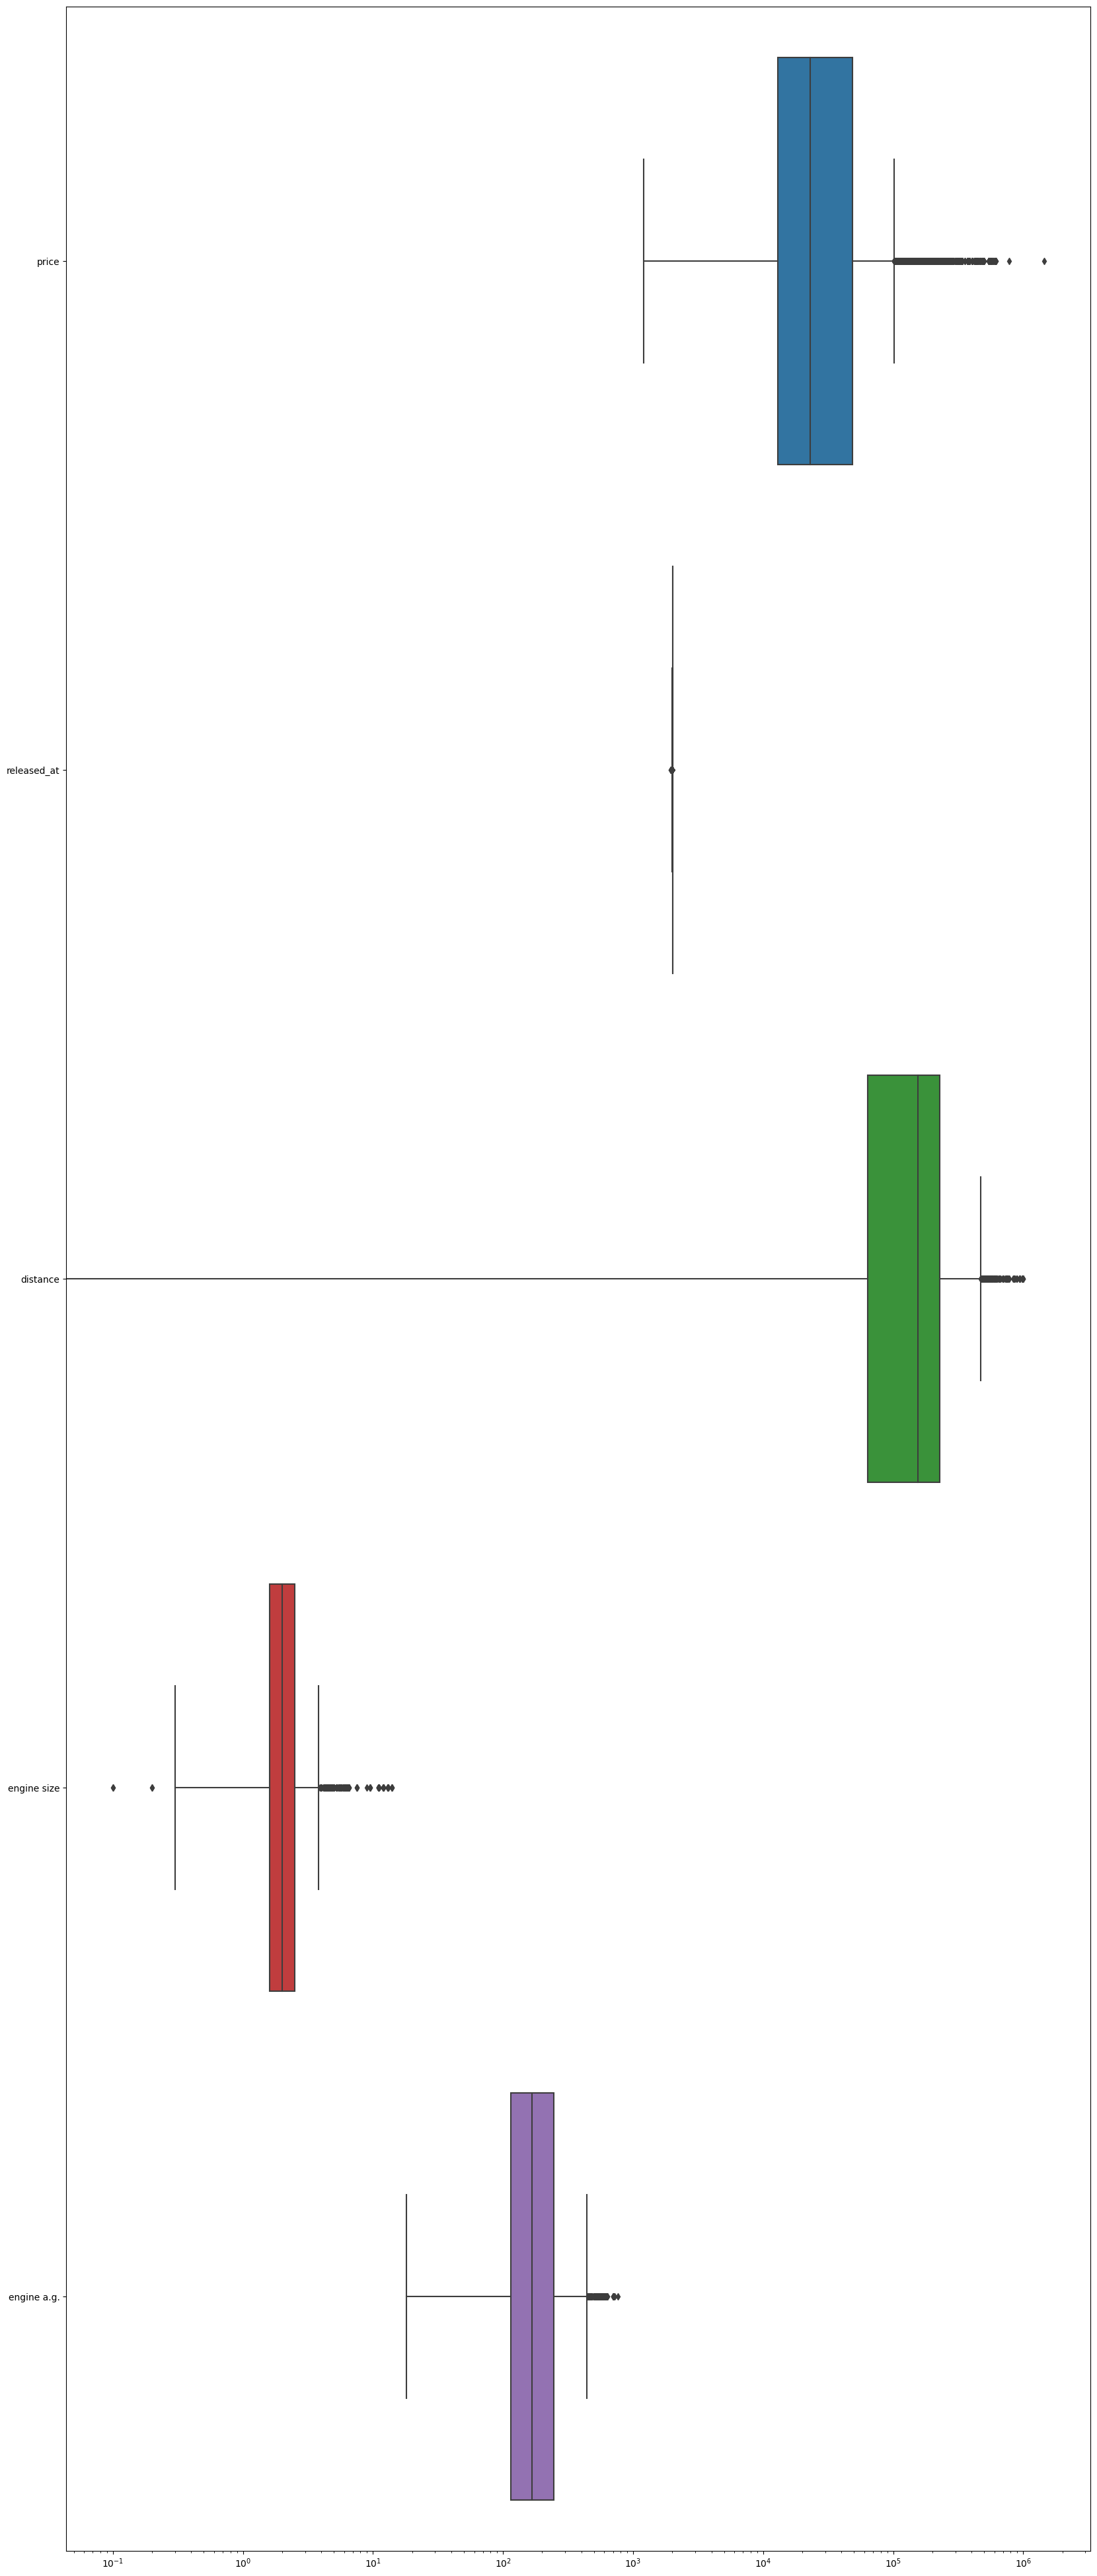

In [168]:
plt.figure(figsize=(20,50))
ax=sns.boxplot(data=df,orient='h')
ax.set(xscale='log')


### Bins for Stratify parameter


In [169]:
df['price'].describe()

count    1.124900e+04
mean     4.351998e+04
std      6.317940e+04
min      1.200000e+03
25%      1.290000e+04
50%      2.300000e+04
75%      4.850000e+04
max      1.445000e+06
Name: price, dtype: float64

In [112]:
df['price_clasificattion']=[1 if xb<1.290000e+04/4 else
2 if xb>=1.290000e+04/4 				and xb<1.290000e+04/2 					else
3 if xb>=1.290000e+04/2					and xb<1.290000e+04+1.290000e+04/4 		else
4 if xb>=1.290000e+04+1.290000e+04/4 	and xb<1.290000e+04 					else
5 if xb>=1.290000e+04	 				and xb<2.300000e+04/4 					else
6 if xb>=2.300000e+04/4 				and xb<2.300000e+04/2					else
7 if xb>=2.300000e+04/2					and xb<2.300000e+04/2+2.300000e+04/4	else
8 if xb>=2.300000e+04/2+2.300000e+04/4	and xb<2.300000e+04 					else
9 if xb>=2.300000e+04					and xb<4.850000e+04/4 					else
10 if xb>=4.850000e+04/4				and xb<4.850000e+04/2 					else
11 if xb>=4.850000e+04/2 				and xb<4.850000e+04/2+4.850000e+04/4	else
12 if xb>=4.850000e+04/2+4.850000e+04/4	and xb<4.850000e+04						else
13 if xb>=4.850000e+04					and xb<1.445000e+06/4					else
14 if xb>=1.445000e+06/4				and xb<1.445000e+06/2					else
15 #$if xb>=1.445000e+06/2				and xb<1.445000e+06/2+1.445000e+06/4	else16 
for xb in df['price']]

In [113]:
df[df['price_clasificattion']==15]

,price,brand,model,released_at,city,ban,color,distance,gearbox,transmitter,is_new,engine size,engine a.g.,engine fuel,price_clasificattion
2702,782000.0,McLaren,720S,2022,Bakı,Kupe,Qara,0,Avtomat,Arxa,Bəli,4.0,720,Benzin,15
8692,1445000.0,Mercedes,170 V,1938,Sumqayıt,Kupe,Qara,82000,Mexaniki,Arxa,Xeyr,2.4,85,Benzin,15


In [114]:
df.head()

,price,brand,model,released_at,city,ban,color,distance,gearbox,transmitter,is_new,engine size,engine a.g.,engine fuel,price_clasificattion
0,13800.0,Nissan,Tiida,2012,Bakı,Hetçbek,Gümüşü,153200,Avtomat,Ön,Xeyr,1.5,109,Benzin,3
1,50150.0,Porsche,Cayenne,2012,Bakı,Offroader / SUV,Qara,198000,Avtomat,Tam,Xeyr,3.6,300,Benzin,13
2,59330.0,Mitsubishi,L 200,2022,Bakı,Pikap,Gümüşü,0,Mexaniki,Tam,Bəli,2.4,137,Dizel,13
3,102084.0,Alfa Romeo,Stelvio,2022,Bakı,Offroader / SUV,Göy,0,Avtomat,Tam,Bəli,2.0,280,Benzin,13
4,79900.0,BMW,X5,2014,Bakı,Offroader / SUV,Ağ,160307,Avtomat,Tam,Xeyr,3.0,306,Benzin,13


In [170]:
##2728 ERROR

#$df['price_clasificattion']=[1 if xb<1.290000e+04/8 else
#$2 if xb>=1.290000e+04/8 				and xb<1.290000e+04/4 					else
#$3 if xb>=1.290000e+04/4					and xb<1.290000e+04/4+1.290000e+04/8 	else
#$4 if xb>=1.290000e+04/4+1.290000e+04/8 	and xb<1.290000e+04/2 					else
#$5 if xb>=1.290000e+04/2					and xb<1.290000e+04/2+1.290000e+04/8 	else
#$6 if xb>=1.290000e+04/2+1.290000e+04/8 	and xb<1.290000e+04/2+1.290000e+04/4	else
#$7 if xb>=1.290000e+04/2+1.290000e+04/4	and xb<1.290000e+04/2-1.290000e+04/8 	else
#$8 if xb>=1.290000e+04/2-1.290000e+04/8	and xb<1.290000e+04                 	else
#$9 if xb>=1.290000e+04     				and xb<2.300000e+04/8 					else

#$10 if xb>=2.300000e+04/8 				    and xb<2.300000e+04/4 					else
#$11 if xb>=2.300000e+04/4					and xb<2.300000e+04/4+2.300000e+04/8 	else
#$12 if xb>=2.300000e+04/4+2.300000e+04/8 	and xb<2.300000e+04/2 					else
#$13 if xb>=2.300000e+04/2					and xb<2.300000e+04/2+2.300000e+04/8 	else
#$14 if xb>=2.300000e+04/2+2.300000e+04/8 	and xb<2.300000e+04/2+2.300000e+04/4	else
#$15 if xb>=2.300000e+04/2+2.300000e+04/4	    and xb<2.300000e+04/2-2.300000e+04/8 	else
#$16 if xb>=2.300000e+04/2-2.300000e+04/8	    and xb<2.300000e+04                 	else
#$17 if xb>=2.300000e+04     				    and xb<4.850000e+04/8 					else

#$18 if xb>=4.850000e+04/8 			    	and xb<4.850000e+04/4 					else
#$19 if xb>=4.850000e+04/4					and xb<4.850000e+04/4+4.850000e+04/8 	else
#$20 if xb>=4.850000e+04/4+4.850000e+04/8 	and xb<4.850000e+04/2 					else
#$21 if xb>=4.850000e+04/2					and xb<4.850000e+04/2+4.850000e+04/8 	else
#$22 if xb>=4.850000e+04/2+4.850000e+04/8 	and xb<4.850000e+04/2+4.850000e+04/4	else
#$23 if xb>=4.850000e+04/2+4.850000e+04/4	    and xb<4.850000e+04/2-4.850000e+04/8 	else
#$24 if xb>=4.850000e+04/2-4.850000e+04/8	    and xb<4.850000e+04                 	else
#$25 if xb>=4.850000e+04     				    and xb<1.445000e+06/8 					else

#$26 if xb>1.445000e+06/8 			    	and xb<1.445000e+06/4 					else
#$27 if xb>=1.445000e+06/4					and xb<1.445000e+06/4+1.445000e+06/8 	else
#$28 if xb>=1.445000e+06/4+1.445000e+06/8 	and xb<1.445000e+06/2 					else
#$29 #$if xb>=1.445000e+06/2					and xb<1.445000e+06/2+1.445000e+06/8 	else
#$#$30 if xb>=1.445000e+06/2+1.445000e+06/8 	and xb<1.445000e+06/2+1.445000e+06/4	else
#$#$31 if xb>=1.445000e+06/2+1.445000e+06/4	    and xb<1.445000e+06/2-1.445000e+06/8 	else 32
#$for xb in df['price']]



## 2800 ERROR

#$df['price_clasificattion']=[1 if xb<1.290000e+04 else 2 if xb>=1.290000e+04 and xb<2.300000e+04 else 3 if xb>=2.300000e+04 and xb<4.850000e+04 else 4 for xb in df['price']]




## 2600 ERROR

#$df['price_clasificattion']=[1 if xb<1.290000e+04/2 else
#$2 if xb>=1.290000e+04/2 and xb<1.290000e+04    else
#$3 if xb>=1.290000e+04 and xb<2.300000e+04/2  else
#$4 if xb>=2.300000e+04/2 and xb<2.300000e+04 else
#$5 if xb>=2.300000e+04 and xb<4.850000e+04/2 else
#$6 if xb>=4.850000e+04/2 and xb<4.850000e+04 else
#$7 if xb>=4.850000e+04 and xb<1.445000e+06/2 else
#$8 for xb in df['price']]


####  train_test_split

In [171]:
st=df['price_clasificattion']
X=df.drop(["price","price_clasificattion"],axis=1)
y=pd.DataFrame(df["price"])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4,stratify=st)


#### Pipeline Transfromer

In [172]:
cat_col

Index(['brand', 'model', 'city', 'ban', 'color', 'gearbox', 'transmitter',
       'is_new', 'engine fuel'],
      dtype='object')

In [173]:
num_col=X.select_dtypes(include='number').columns
cat_col=X.select_dtypes(include='object').columns


num_Pipeline = Pipeline([('scaler', StandardScaler())])
cat_Pipeline = Pipeline([('encoder', OneHotEncoder())])


preprocessor=ColumnTransformer(
    [
    ('num',num_Pipeline,num_col),
    ('cat',cat_Pipeline,cat_col)
    ]
)


final_pipeline=Pipeline([
    ('transformer',preprocessor),
    ('predictor', RandomForestRegressor())
]
)


In [131]:
param_grid = {
    'transformer__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'transformer__cat__encoder': [LabelEncoder(), OneHotEncoder(),BinaryEncoder(),JamesSteinEncoder(),HashingEncoder(),CountEncoder()],
    'predictor' : [RandomForestRegressor(),GradientBoostingRegressor(),SVR(),GaussianNB(),KNeighborsRegressor()]
}


scoring = {'mse': make_scorer(mean_squared_error), 'r2': make_scorer(r2_score),'mean_ae' : make_scorer(mean_absolute_error),'median_ae' : make_scorer(median_absolute_error)}

grid_search = GridSearchCV(final_pipeline,
                          cv=5,
                          return_train_score=True,
                          scoring=scoring,
                          param_grid=param_grid,refit=False)

    

In [132]:
K=grid_search.fit(X_train, y_train)


### Analyzing Results

In [133]:
T=pd.DataFrame(K.cv_results_)

In [134]:
T.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_predictor,param_transformer__cat__encoder,param_transformer__num__scaler,params,split0_test_mse,split1_test_mse,split2_test_mse,split3_test_mse,split4_test_mse,mean_test_mse,std_test_mse,rank_test_mse,split0_train_mse,split1_train_mse,split2_train_mse,split3_train_mse,split4_train_mse,mean_train_mse,std_train_mse,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2,split0_test_mean_ae,split1_test_mean_ae,split2_test_mean_ae,split3_test_mean_ae,split4_test_mean_ae,mean_test_mean_ae,std_test_mean_ae,rank_test_mean_ae,split0_train_mean_ae,split1_train_mean_ae,split2_train_mean_ae,split3_train_mean_ae,split4_train_mean_ae,mean_train_mean_ae,std_train_mean_ae,split0_test_median_ae,split1_test_median_ae,split2_test_median_ae,split3_test_median_ae,split4_test_median_ae,mean_test_median_ae,std_test_median_ae,rank_test_median_ae,split0_train_median_ae,split1_train_median_ae,split2_train_median_ae,split3_train_median_ae,split4_train_median_ae,mean_train_median_ae,std_train_median_ae
85,35.734723,0.462392,17.613680,1.318353,KNeighborsRegressor(),HashingEncoder(max_process=6),RobustScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",2.710740e+08,4.191333e+08,1.428704e+09,3.422373e+08,4.175307e+08,5.757359e+08,4.299881e+08,25,3.911348e+08,3.821559e+08,1.999663e+08,3.834245e+08,3.762475e+08,3.465858e+08,7.346295e+07,0.920714,0.883495,0.701688,0.921608,0.896034,0.864708,0.082806,36,0.906711,0.907887,0.948073,0.903089,0.906965,0.914545,0.016844,7607.745533,8182.559067,8415.433256,8064.715011,8216.582768,8097.407127,269.603989,30,6070.398772,6069.282111,5927.707043,6009.067726,5825.634961,5980.418123,93.327821,2885.0,2880.0,2700.0,2890.0,2706.0,2812.2,89.237660,39,2060.0,2060.0,2076.0,2020.0,2020.0,2047.2,22.964320
86,44.971926,21.820357,18.682060,1.081352,KNeighborsRegressor(),HashingEncoder(max_process=6),MinMaxScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",7.445476e+08,8.092947e+08,1.693085e+09,8.658070e+08,7.651648e+08,9.755797e+08,3.611549e+08,19,6.536374e+08,6.209663e+08,4.565651e+08,6.199637e+08,6.100505e+08,5.922366e+08,6.940939e+07,0.782228,0.775043,0.646486,0.801681,0.809472,0.762982,0.059575,42,0.844102,0.850326,0.881440,0.843303,0.849152,0.853665,0.014155,11335.494067,11187.133556,11143.298811,11661.075778,11502.106237,11365.821690,193.966028,19,8592.250624,8609.393796,8392.098169,8466.155638,8406.057067,8493.191059,91.497423,3833.0,3635.0,3300.0,3760.0,3640.0,3633.6,182.794529,25,2560.0,2620.0,2560.0,2580.0,2600.0,2584.0,23.323808
87,0.454202,0.352191,0.242941,0.186095,KNeighborsRegressor(),CountEncoder(combine_min_nan_groups=True),StandardScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",9.229381e+08,1.160407e+09,1.716646e+09,9.589001e+08,1.003165e+09,1.152411e+09,2.935314e+08,18,7.477658e+08,6.820993e+08,5.686749e+08,7.071289e+08,7.111253e+08,6.833588e+08,6.105448e+07,0.730050,0.677445,0.641566,0.780358,0.750210,0.715926,0.050073,43,0.821652,0.835591,0.852328,0.821272,0.824159,0.831000,0.011872,11959.322544,12705.358289,11462.305967,11911.709333,13261.098533,12259.958933,640.089269,18,9227.641384,9142.720175,9082.052652,8949.289287,9007.350192,9081.810738,98.064166,3392.0,3432.0,3363.0,3600.0,3360.0,3429.4,89.146172,30,2440.0,2466.0,2416.0,2400.0,2460.0,2436.4,25.247574
88,0.147613,0.012840,0.131906,0.013619,KNeighborsRegressor(),CountEncoder(combine_min_nan_groups=True),RobustScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",9.248288e+08,1.160981e+09,1.721231e+09,9.700702e+08,1.008501e+09,1.157123e+09,2.930088e+08,17,7.520153e+08,6.821008e+08,5.709023e+08,7.145063e+08,7.144979e+08,6.868045e+08,6.203579e+07,0.729497,0.677285,0.640609,0.777799,0.748881,0.714814,0.049514,44,0.820638,0.835590,0.851749,0.819408,0.823325,0.830142,0.012236,11990.879544,12739.3039

In [136]:
#$list(filter(lambda x: 'rank' in x,T.columns))
T.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_predictor', 'param_transformer__cat__encoder',
       'param_transformer__num__scaler', 'params', 'split0_test_mse',
       'split1_test_mse', 'split2_test_mse', 'split3_test_mse',
       'split4_test_mse', 'mean_test_mse', 'std_test_mse', 'rank_test_mse',
       'split0_train_mse', 'split1_train_mse', 'split2_train_mse',
       'split3_train_mse', 'split4_train_mse', 'mean_train_mse',
       'std_train_mse', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2',
       'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2',
       'rank_test_r2', 'split0_train_r2', 'split1_train_r2', 'split2_train_r2',
       'split3_train_r2', 'split4_train_r2', 'mean_train_r2', 'std_train_r2',
       'split0_test_mean_ae', 'split1_test_mean_ae', 'split2_test_mean_ae',
       'split3_test_mean_ae', 'split4_test_mean_ae', 'mean_test_mean_ae',
       'std_test_mean_ae', 'rank_test_mean_ae', 'split0_trai

In [149]:
df2=T[['rank_test_r2', 'rank_test_mean_ae','rank_test_mse','rank_test_median_ae', 'mean_test_r2','mean_test_mse','mean_test_mean_ae','mean_test_median_ae','param_predictor', 'param_transformer__cat__encoder','param_transformer__num__scaler']]

In [150]:
df2.sort_values(by=['rank_test_r2','rank_test_mean_ae'],ascending=[True,False])

,rank_test_r2,rank_test_mean_ae,rank_test_mse,rank_test_median_ae,mean_test_r2,mean_test_mse,mean_test_mean_ae,mean_test_median_ae,param_predictor,param_transformer__cat__encoder,param_transformer__num__scaler
3,1,60,60,58,0.928659,3.213326e+08,3366.170523,807.903333,RandomForestRegressor(),OneHotEncoder(),StandardScaler()
4,2,59,59,55,0.927945,3.237472e+08,3396.735475,836.058000,RandomForestRegressor(),OneHotEncoder(),RobustScaler()
5,3,58,58,56,0.927767,3.242108e+08,3398.218291,827.124284,RandomForestRegressor(),OneHotEncoder(),MinMaxScaler()
6,4,53,56,53,0.924978,3.348963e+08,3522.427199,846.500667,RandomForestRegressor(),BinaryEncoder(),StandardScaler()
17,5,54,57,49,0.924941,3.347743e+08,3516.134746,872.546000,RandomForestRegressor(),CountEncoder(combine_min_nan_groups=True),MinMaxScaler()
7,6,49,55,52,0.924551,3.366368e+08,3579.142143,853.751000,RandomForestRegressor(),BinaryEncoder(),RobustScaler()
8,7,50,54,54,0.924141,3.383015e+08,3568.600859,844.984952,RandomForestRegressor(),BinaryEncoder(),MinMaxScaler()
16,8,51,53,50,0.923627,3.397320e+08,3565.389066,869.546005,RandomForestRegressor(),CountEncoder(combine_min_nan_groups=True),RobustScaler()
15,9,52,52,51,0.923526,3.397928e+08,3549.641911,855.464395,RandomForestRegressor(),CountEncoder(combine_min_nan_groups=True),StandardScaler()
10,10,57,51,59,0.922760,3.426041e+08,3478.256727,801.196667,RandomForestRegressor(),JamesSteinEncoder(),RobustScaler()


### Difference between MAE best and worst

In [187]:
num_col=X.select_dtypes(include='number').columns
cat_col=X.select_dtypes(include='object').columns


num_Pipeline = Pipeline([('scaler', RobustScaler())])
cat_Pipeline = Pipeline([('encoder', OneHotEncoder())])


preprocessor=ColumnTransformer(
    [
    ('num',num_Pipeline,num_col),
    ('cat',cat_Pipeline,cat_col)
    ]
)


final_pipeline=Pipeline([
    ('transformer',preprocessor),
    ('predictor', RandomForestRegressor())
]
)

In [188]:
n=final_pipeline.fit(X_train, y_train).predict(X_train)

In [189]:
mean_absolute_error(y_train, n)

1173.8049662346352

In [190]:
n=final_pipeline.fit(X_train, y_train).predict(X_test)

In [191]:
mean_absolute_error(y_test, n)

2608.8692996300106

In [83]:
num_col=X.select_dtypes(include='number').columns
cat_col=X.select_dtypes(include='object').columns


num_Pipeline = Pipeline([('scaler', MinMaxScaler())])
cat_Pipeline = Pipeline([('scaler', HashingEncoder(max_process=6))])


preprocessor=ColumnTransformer(
    [
    ('num',num_Pipeline,num_col),
    ('cat',cat_Pipeline,cat_col)
    ]
)


final_pipeline=Pipeline([
    ('transformer',preprocessor),
    ('predictor', SVR())
]
)

n=final_pipeline.fit(X_train, y_train).predict(X_test)
mean_absolute_error(y_test, n)

30367.456806245

### Hyparametr Turning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the RandomForestRegressor object
rf = RandomForestRegressor()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


In [23]:

# get the best estimator and print the best hyperparameters
best_estimator = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

You are correct that label encoding is often used for ordinal data, where the categorical variables have an inherent order to them (e.g., low, medium, high). However, label encoding can also be used for nominal data, where the categories have no inherent order (e.g., red, blue, green). In this case, the labels assigned to each category are arbitrary, but still allow the categories to be represented numerically.

If your categorical data is nominal, an alternative to label encoding is one-hot encoding, also known as dummy encoding. This technique creates a new binary variable for each category in a categorical variable, with a value of 1 indicating that the category is present and 0 indicating that it is not. One-hot encoding is suitable for nominal data because it avoids any numerical ordering of the categories.

However, as you mentioned, one-hot encoding can lead to a large number of columns when there are many categories, which can lead to the curse of dimensionality. In this case, you may want to consider other encoding techniques such as binary encoding or target encoding. These techniques are designed to reduce the number of dimensions created while still preserving the information in the data.

Binary encoding and target encoding are two alternative techniques for encoding categorical variables that can be useful in certain situations.

Binary encoding involves converting each unique value of a categorical variable into a binary code, where each digit in the code represents a power of 2. For example, if a variable has three unique values, they might be encoded as follows:

Original value	Binary encoding
red	001
green	010
blue	100
Binary encoding has the advantage of reducing the number of columns needed to represent categorical variables with a large number of unique values. For example, if a variable has 100 unique values, binary encoding would require only 7 columns (since log2(100) ≈ 7), whereas one-hot encoding would require 100 columns.

Target encoding, on the other hand, involves replacing each unique value of a categorical variable with the mean of the target variable for that value. For example, if a variable has three unique values and the target variable is a binary variable indicating whether a customer made a purchase (1) or not (0), the target encoding might be as follows:

Original value	Target encoding
red	0.5
green	0.25
blue	0.75
Target encoding can be useful when you suspect that the categorical variable is related to the target variable in a non-linear way that is not well captured by one-hot encoding or binary encoding. However, it is important to be careful when using target encoding, as it can introduce bias into your analysis if the distribution of the target variable is not balanced across the categories of the categorical variable.

In general, the choice between binary encoding, target encoding, and other encoding techniques will depend on the nature of your data and the goals of your analysis.

In [ ]:
import pandas as pd
import category_encoders as ce

# Example categorical data
data = pd.DataFrame({
    'Color': ['red', 'blue', 'green', 'green', 'red', 'blue']
})

# Binary encoding
bin_enc = ce.BinaryEncoder(cols=['Color'])
bin_data = bin_enc.fit_transform(data)

# Print the encoded data
print(bin_data)